### Requirements
-----

In [1]:
import numpy as np
np.__version__

'1.26.4'

In [2]:
import pandas as pd
pd.__version__

'1.5.3'

In [3]:
import scipy
scipy.__version__

'1.13.1'

In [4]:
import matplotlib
matplotlib.__version__

'3.9.0'

-----

In [5]:
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

### DATA 
_________

In [6]:
data = {
    'variation_a': {
        'c': np.array([1642, 1660, 1728, 1878, 1234, 1320, 1826, 2768, 2940, 3016, 2060,
                       3072, 1984, 1544, 1496, 1372, 2278, 2314, 2284, 1452, 1810, 2162,
                       1410, 1294, 2096, 1366, 1262, 1022, 1444, 1114, 1688, 2362, 1210,
                       1518, 3646, 1954, 2146, 2100, 2794, 2064, 1886, 1732, 2878, 1700,
                       1968, 1430, 1254, 1642, 1558, 1148, 1282, 1264, 1568, 2254, 1416,
                       1778, 2072, 2248, 1682, 1152, 1540, 1270, 1848, 1928, 1464, 1746,
                       2222, 1184, 1170,   62],
                      dtype=float),
        'n': np.array([24186, 22240, 21915, 24046, 21620, 21651, 22624, 25476, 24232,
                       26996, 24418, 26906, 21262, 20247, 21377, 21237, 26087, 25624,
                       24754, 23289, 21968, 21819, 20614, 18778, 23902, 21089, 19599,
                       16136, 19584, 16925, 23675, 26319, 20691, 21535, 25220, 22885,
                       24725, 25090, 26551, 24389, 23229, 24359, 25755, 25270, 23617,
                       21501, 24459, 23413, 21180, 19490, 28164, 19612, 21427, 27168,
                       25076, 25819, 26386, 26784, 23879, 24669, 22962, 24776, 23591,
                       20815, 22421, 25605, 24855, 20280, 22752,   716],
                      dtype=float)
    },
    'variation_b': {
        'c': np.array([1714, 1778, 1848, 2008, 1270, 1372, 1868, 2872, 3014, 3110, 2094,
                       3278, 1982, 1648, 1500, 1362, 2582, 2326, 2386, 1540, 1892, 2160,
                       1476, 1336, 2108, 1418, 1252, 1078, 1550, 1156, 1860, 2288, 1228,
                       1602, 3766, 2000, 2320, 2166, 3010, 2010, 1928, 1890, 2960, 1716,
                       1950, 1534, 1418, 1796, 1522, 1224, 1346, 1350, 1534, 2436, 1404,
                       1790, 2180, 2574, 1824, 1162, 1586, 1390, 1950, 2020, 1484, 1818,
                       2348, 1280, 1136,   60],
                      dtype=float),
        'n': np.array([24909, 22986, 22953, 24896, 22284, 22563, 23196, 26238, 24871,
                       27869, 25301, 27779, 22008, 21020, 22037, 22006, 27070, 26169,
                       25518, 24043, 22593, 22195, 21015, 19337, 24448, 21765, 19933,
                       16672, 20329, 17638, 24427, 27232, 21468, 21966, 25987, 23607,
                       25487, 25926, 27237, 25163, 23965, 25037, 26214, 25999, 24272,
                       22336, 25271, 24220, 22014, 20195, 29069, 20320, 22058, 28055,
                       25992, 26678, 26949, 27701, 24951, 25561, 23766, 25646, 24677,
                       21441, 23269, 26265, 25563, 20869, 23276,   707],
                      dtype=float)
    }
}

__________
### FREQUENTIST ANALYSIS
_________

$$\text{conversion rate}=\lambda=\frac{\sum_{i=1}^N \text{nb unique buyers day i}}{\sum_{i=1}^N \text{nb unique visitors day i}}=\frac{c}{n}$$

- $z$-Test

$$z=\frac{\lambda_B-\lambda_A}{\sqrt{\frac{\lambda_B(1-\lambda_B)}{n_B}+\frac{\lambda_A(1-\lambda_A)}{n_A}}}$$

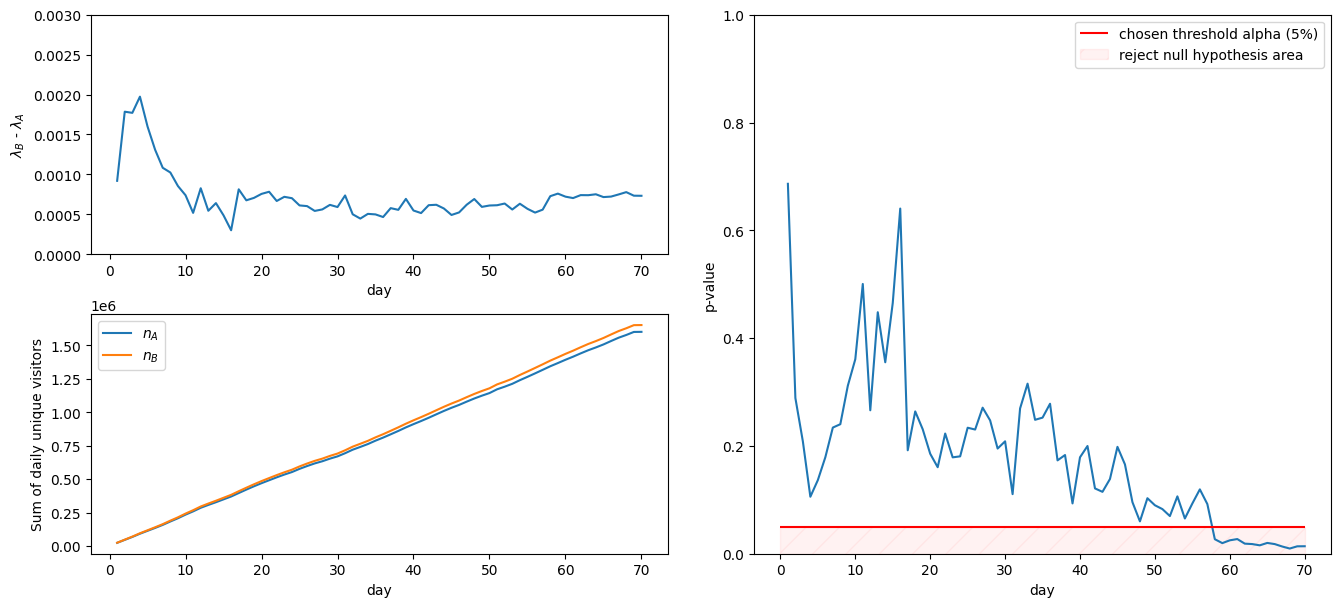

In [7]:
nb_days = len(data['variation_a']['c'])

cr_a = [sum(data['variation_a']['c'][:i]) / sum(data['variation_a']['n'][:i])
        for i in range(1, nb_days+1)]

n_a = [sum(data['variation_a']['n'][:i])
       for i in range(1, nb_days+1)]

cr_b = [sum(data['variation_b']['c'][:i]) / sum(data['variation_b']['n'][:i])
        for i in range(1, nb_days+1)]

n_b = [sum(data['variation_b']['n'][:i])
       for i in range(1, nb_days+1)]

delta_cr = [(cr_x-cr_y) for cr_x, cr_y in zip(cr_b, cr_a)]

z = [delta/np.sqrt(cr_x*(1-cr_x)/n_x+cr_y*(1-cr_y)/n_y)
     for delta, cr_x, n_x, cr_y, n_y in zip(delta_cr, cr_b, n_b, cr_a, n_a)]

f = plt.figure(figsize=(16, 7))
gs0 = gridspec.GridSpec(2, 2, figure=f, wspace=.15, hspace=.25)
ax1 = f.add_subplot(gs0[:1, :1])
ax2 = f.add_subplot(gs0[1:, :1])
ax3 = f.add_subplot(gs0[:, 1:])

ax1.plot(range(1, len(delta_cr)+1), delta_cr)
ax1.set_ylim(0, 0.003)
ax1.set_xlabel('day')
ax1.set_ylabel('$\\lambda_B$ - $\\lambda_A$')

ax2.plot(range(1, len(delta_cr)+1), n_a, label='$n_A$')
ax2.plot(range(1, len(delta_cr)+1), n_b, label='$n_B$')
ax2.set_xlabel('day')
ax2.set_ylabel('Sum of daily unique visitors')
ax2.legend()

ax3.plot(range(1, len(z)+1), 2 * (1 - stats.norm.cdf(z)))
ax3.hlines(.05, 0, 70, color='red', label='chosen threshold alpha (5%)')
ax3.set_xlabel('day')
ax3.set_ylabel('p-value')
ax3.set_ylim(0,1)
ax3.fill_between(range(0, 71), .05, alpha=.05, color='red', hatch= '/', label='reject null hypothesis area')
ax3.legend()

plt.show()

__________
### BAYESIAN APPROACH
__________

$$P(\lambda|data)=\frac{P(data|\lambda)P(\lambda)}{P(data)}$$

The **Beta** distribution $f(x; a=1,b=1)$ can be used as the prior if we do not make any assumption about the conversion rate (it is equivalent to the uniform law over $[0;1]$, which only assumes two prior observations: one conversion and one non-conversion) $\rightarrow$ posterior: $f(a+c,b+(n-c))$.


The Beta distribution with parameters $a$ and $b$:

$$f(x;a,b)=\frac{1}{B(a,b)} x^{a-1}(1-x)^{b-1}=\frac{\Gamma(a,b)}{\Gamma(a)\Gamma(b)} x^{a-1}(1-x)^{b-1},0\leq x\leq1$$

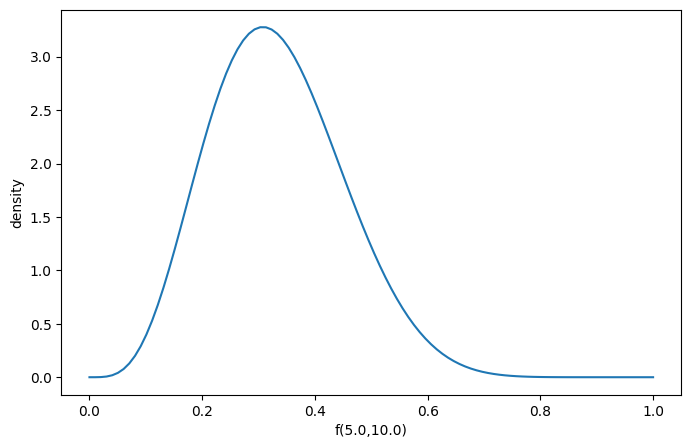

interactive(children=(FloatSlider(value=5.0, description='a', max=11.0, min=0.0001, step=1.0), FloatSlider(val…

In [9]:
@interact(a=(0.0001,11,1), b=(0.0001,21,1))
def beta_plot(a=5, b=10):
    plt.figure(figsize=(8,5))

    beta = lambda x, a, b: stats.beta.pdf(x, a, b)
    plt.plot(np.linspace(0, 1, 100), beta(np.linspace(0, 1, 100), a, b))
    plt.xlabel(f'f({a},{b})')
    plt.ylabel('density')

- Joint posterior:

$$P(\lambda_A,\lambda_B)=P(\lambda_A|n_A,c_A).P(\lambda_B|n_B,c_B)$$

- The probability that B is better than A (i.e. probability to make a mistake by choosing A):

$$E[I](A)=\int_0^1 \int_0^{\lambda_A} P(\lambda_A,\lambda_B)d\lambda_B d\lambda_A$$

- The expected loss if we choose variant “?”:

$$E[L](?)\int_0^1 \int_0^1 L(\lambda_A,\lambda_B,?)P(\lambda_A,\lambda_B)d\lambda_B d\lambda_A$$

- The magnitude of the error if we choose A:

$$L(\lambda_A,\lambda_B,A) = \max{(\lambda_B-\lambda_A,0)}$$

The expected loss (i.e. $Ε[L]$) takes into account both the probability that we’re choosing the worse variant via the probability density function (p.d.f.) $P(\lambda_A, \lambda_B)$ and the magnitude of potential mistake via $L(\lambda_A,\lambda_B,?)$ with “?” = $A$ or $B$ which, for instance with “?” = $A$, gives $0$ if $\lambda_A > \lambda_B$ and $\lambda_B-\lambda_A$ if not.

$\Rightarrow$ Knowing $\epsilon$, the expected losses and  $P(\lambda_B > \lambda_A)$, make a decision about the winning variation.

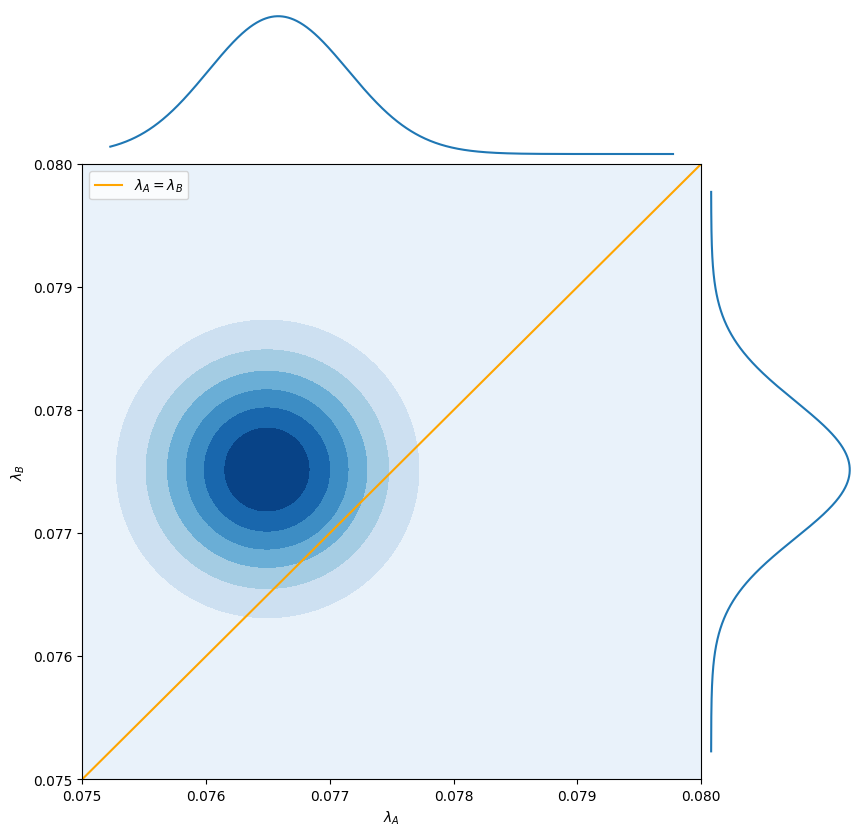

In [10]:
N_plot = 1000
day = 8

X = np.linspace(0.075,.08,N_plot)

posterior_a = stats.beta.pdf(X, 
                             1+sum(data['variation_a']['c'][:day]),
                             1+(sum(data['variation_a']['n'][:day])-sum(data['variation_a']['c'][:day])))
posterior_b = stats.beta.pdf(X, 
                             1+sum(data['variation_b']['c'][:day]),
                             1+(sum(data['variation_b']['n'][:day])-sum(data['variation_b']['c'][:day])))

A, B = np.meshgrid(posterior_a, posterior_b)

Z = A * B

f = plt.figure(figsize=(12,10))
gs0 = gridspec.GridSpec(5, 6, figure=f, wspace=.02, hspace=.02)
ax1 = f.add_subplot(gs0[1:, :-2])
ax2 = f.add_subplot(gs0[:1, :-2])
ax3 = f.add_subplot(gs0[1:, -2:-1])

ax1.contourf(X, X, Z, cmap= 'Blues')
ax1.plot(X, X, color = 'orange', label = '$\\lambda_A = \\lambda_B$')
ax2.plot(X, posterior_a)
ax3.plot(posterior_b, X)

ax1.set_xlabel('$\\lambda_A$')
ax1.set_ylabel('$\\lambda_B$')

ax3.set_axis_off()
ax2.set_axis_off()

ax1.legend()
plt.show()

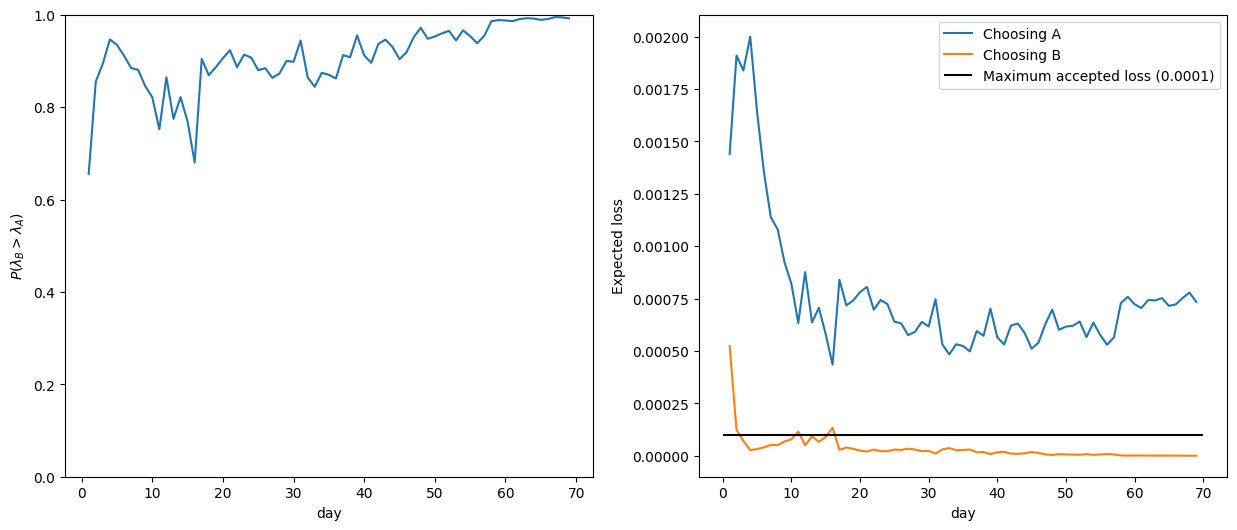

In [12]:
# Monte Carlo integration (importance Sampling)
N_mc = 100000

proba_b_better_a = []
proba_b_better_a_error = []
expected_loss_a = []
expected_loss_a_error = []
expected_loss_b = []
expected_loss_b_error = []

for day in range(1, 70):

    mean_a, var_a = stats.beta.stats(a=1+sum(data['variation_a']['c'][:day]), 
                                     b=1+(sum(data['variation_a']['n'][:day])-sum(data['variation_a']['c'][:day])), 
                                     moments='mv')

    mean_b, var_b = stats.beta.stats(a=1+sum(data['variation_b']['c'][:day]), 
                                     b=1+(sum(data['variation_b']['n'][:day])-sum(data['variation_b']['c'][:day])), 
                                     moments='mv')

    randx_a = np.random.normal(loc=mean_a, 
                             scale=1.25*np.sqrt(var_a), 
                             size=N_mc)
    randx_b = np.random.normal(loc=mean_b, 
                             scale=1.25*np.sqrt(var_b), 
                             size=N_mc)

    f_a = stats.beta.pdf(randx_a,
                       a = 1+sum(data['variation_a']['c'][:day]), 
                       b = 1+(sum(data['variation_a']['n'][:day])-sum(data['variation_a']['c'][:day])))
    f_b = stats.beta.pdf(randx_b,
                       a = 1+sum(data['variation_b']['c'][:day]), 
                       b = 1+(sum(data['variation_b']['n'][:day])-sum(data['variation_b']['c'][:day])))

    g_a = stats.norm.pdf(randx_a,
                           loc=mean_a, 
                           scale=1.25*np.sqrt(var_a))
    g_b = stats.norm.pdf(randx_b,
                           loc=mean_b, 
                           scale=1.25*np.sqrt(var_b))

    y = (f_a * f_b) / (g_a * g_b)

    y_b = y[randx_b>=randx_a]

    p = 1/N_mc * sum(y_b)
    perr = np.sqrt(1*(y_b*y_b).sum()/N_mc - (1*y_b.sum()/N_mc)**2)/np.sqrt(N_mc)

    y_loss_a = ((randx_b-randx_a)*y)[randx_b>=randx_a]
    loss_A = 1/N_mc * sum(y_loss_a)
    loss_A_err = np.sqrt(1*(y_loss_a*y_loss_a).sum()/N_mc - (1*y_loss_a.sum()/N_mc)**2)/np.sqrt(N_mc)
    
    y_loss_b = ((randx_a-randx_b)*y)[randx_a>=randx_b]
    loss_B = 1/N_mc * sum(y_loss_b)
    loss_B_err = np.sqrt(1*(y_loss_b*y_loss_b).sum()/N_mc - (1*y_loss_b.sum()/N_mc)**2)/np.sqrt(N_mc)    
    
    proba_b_better_a.append(p)
    proba_b_better_a_error.append(perr)
    
    expected_loss_a.append(loss_A)
    expected_loss_a_error.append(loss_A_err)
    
    expected_loss_b.append(loss_B)
    expected_loss_b_error.append(loss_B_err)
    
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].set_ylim(0,1)
axs[0].plot(range(1, 70), proba_b_better_a)
axs[0].fill_between(range(1, 70), 
                 np.array(proba_b_better_a) - np.array(proba_b_better_a_error), 
                 np.array(proba_b_better_a) + np.array(proba_b_better_a_error), 
                 alpha = .5)

axs[1].plot(range(1, 70), expected_loss_a, label = 'Choosing A')
axs[1].fill_between(range(1, 70), 
                 np.array(expected_loss_a) - np.array(expected_loss_a_error), 
                 np.array(expected_loss_a) + np.array(expected_loss_a_error), 
                 alpha = .5)

axs[1].plot(range(1, 70), expected_loss_b, label = 'Choosing B')
axs[1].fill_between(range(1, 70), 
                 np.array(expected_loss_b) - np.array(expected_loss_b_error), 
                 np.array(expected_loss_b) + np.array(expected_loss_b_error), 
                 alpha = .5)
axs[1].hlines(.0001, 0, 70, color='black', label='Maximum accepted loss (0.0001)')

axs[0].set_ylabel('$P(\\lambda_B>\\lambda_A)$')
axs[0].set_xlabel('day')
axs[1].set_xlabel('day')
axs[1].set_ylabel('Expected loss')

axs[1].legend()

plt.show()

_____
### MONTE CARLO INTEGRATION
_____

$$F=\int_a^b f(x)dx$$

The idea behind Monte Carlo integration is to approximate the integral value by the averaged area of rectangles computed for random picked $x_i$.

$$<F^N> = (b-a)\frac{1}{N-1}\sum_{i=0}^N f(X_i)$$

Variance of the estimator $\frac{\sigma^2}{N}$.

-----
### $\Rightarrow$ Crude Monte Carlo

- Random draws $x_i$ are made over $X$ following a uniform law.

- We compute the sum of $f(x_i)$, multiply it by $(b-a)$ and divide by the number of samples N.

$$I=\frac{b-a}{N}\sum_{i=0}^N f(x_i)$$

$$Error=\sqrt{\frac{\frac{b-a}{N}\sum_{i=0}^N f^2(x_i) - (b-a)\mu^2}{N}}$$

Real value to find: 0.9573798599455123
Integral value:  0.9587230318958072
Calculation error: 0.008324875494626323


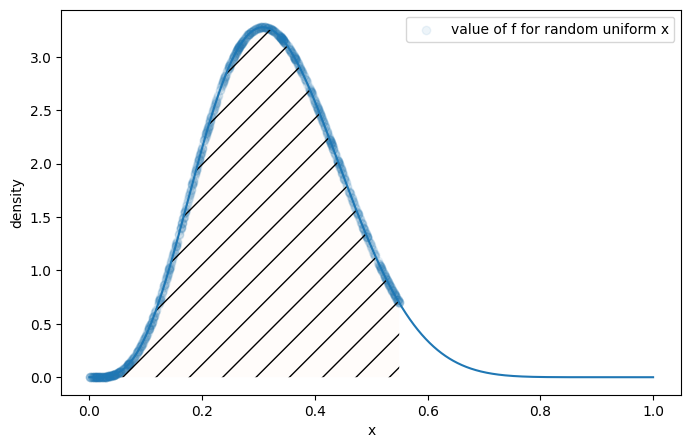

In [13]:
N = 10000
a, b = (5,10)
x_min, x_max = (0, .55)
randx = np.random.uniform(x_min, x_max, N)
y = stats.beta.pdf(randx, a, b)
print(f'Real value to find: {stats.beta(a,b).cdf(.55)}')
print(f'Integral value:  {(x_max-x_min)*y.sum()/N}')
print(f'Calculation error: {np.sqrt((x_max-x_min)*(y*y).sum()/N - (x_max-x_min)*y.mean()**2)/np.sqrt(N)}')

# Plotting 
plt.figure(figsize=(8,5))
x = np.linspace(0, 1, 1000)
x_to_fill = np.array([0 for _ in range(len(x))])
x_to_fill[(x>=x_min) & (x<=x_max)] = 1

plt.plot(x, stats.beta.pdf(x, a, b))
# Then, let's only plot a thousand points for more readability
plt.scatter(randx[:1000], y[:1000], alpha=.08, label='value of f for random uniform x')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.fill_between(x, stats.beta.pdf(x, a, b), alpha=.02, where=x_to_fill, hatch= '/')
plt.show()

-----
### $\Rightarrow$ Geometric Estimation

By using uniform random draws over both $x$ and $y$ axes, we map a 2D rectangle that corresponds to the desired range $[a;b]$ and compute the ratio of points under the curve over the total points drawn in the rectangle.

$$I=\frac{\text{nb yellow points}}{N_{mc}}.height.width$$

Integral value: 0.9701049643981711


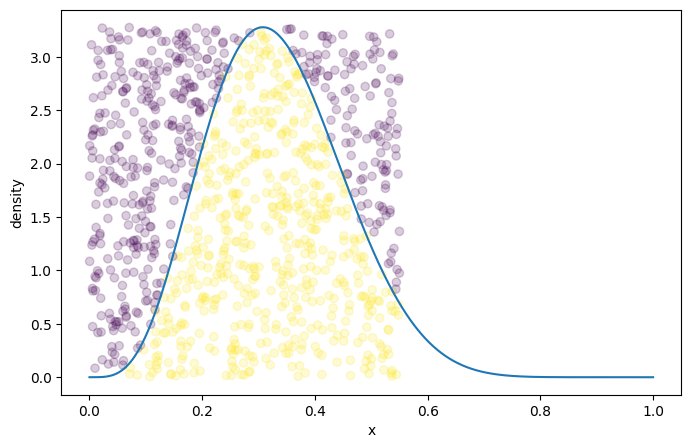

In [14]:
N = 10000
a, b = (5,10)
x_min, x_max = (0, .55)

randx = np.random.uniform(x_min,x_max, N)
y = stats.beta.pdf(randx, a, b)
randy = np.random.uniform(0,y.max(), N)
print(f'Integral value: {(x_max-x_min)*y.max()*(randy <= y).sum()/N}')

plt.figure(figsize=(8,5))
color = randy[:1000] <= y[:1000]
x = np.linspace(0, 1, 1000)
plt.plot(x, stats.beta.pdf(x, a, b))
plt.scatter(randx[:1000], randy[:1000], alpha=.2, c = color)
plt.xlabel('x')
plt.ylabel('density')
plt.show()

-----
### $\Rightarrow$ Importance Sampling

The idea behind Importance Sampling is very simple: as the error of the Monte Carlo estimator is proportional to the standard deviation of $f(x)$ divided by the square root of the number of samples, we should find a cleverer method to chose $x_i$ than the uniform law.

The key idea of Importance Sampling is that we use a probability density function (p.d.f.) to draw samples over $X$ that will give more chance to high values of $f(x)$ to be computed, and then we weight the sum of $f(x)$ by the chance that $x$ happened (i.e. the value of the p.d.f.).

$$I=\frac{1}{N}\sum_{i=1}^N\frac{f(x_i)}{g(x_i)}$$

- $f$: function to integrate
- $g$: p.d.f chosen for the random draws over X

Integral value: 0.963167408849168
Error: 0.0037131213937138946



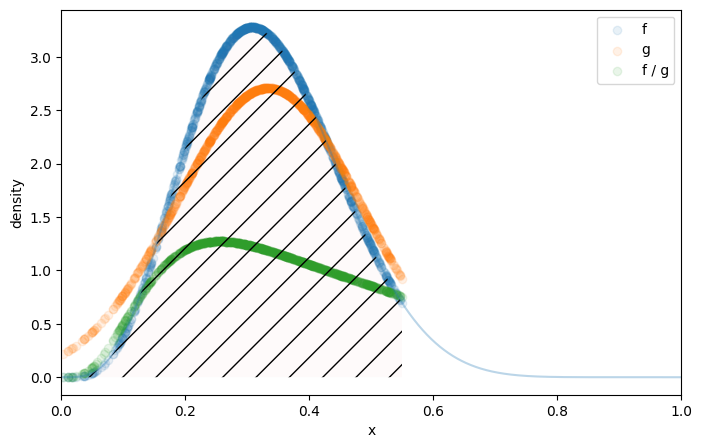

In [15]:
n = 10000
a, b = (5,10)
x_min, x_max = (0, .55)

mean, var = stats.beta.stats(a, b, moments='mv')

randx = np.random.normal(mean, 1.25*np.sqrt(var), size=n)
randx_uniform = np.random.uniform(x_min, x_max, size=n)

randx = randx[(randx >= x_min) & (randx <= x_max)]

f = stats.beta(a,b).pdf(randx)
f_uniform = stats.beta(a,b).pdf(randx_uniform)
g = stats.norm.pdf(randx, mean, 1.25*np.sqrt(var))

y = f / g

print(f'Integral value: {1*y.sum()/n}')
print(f'Error: {np.sqrt(1/n * (y * y).sum() - (1/n * y.sum())**2)/np.sqrt(n)}', end = '\n\n')

plt.figure(figsize=(8,5))

plt.scatter(randx[:1000], f[:1000], alpha=0.1, label='f')
plt.scatter(randx[:1000], g[:1000], alpha=0.1, label='g')
plt.scatter(randx[:1000], y[:1000], alpha=0.1, label='f / g')

x = np.linspace(0, 1, 1000)
x_to_fill = np.array([0 for _ in range(len(x))])
x_to_fill[(x>=x_min) & (x<=x_max)] = 1

plt.plot(x, stats.beta.pdf(x, a, b), alpha= .3)
plt.fill_between(x, stats.beta.pdf(x, a, b), alpha=.02, where=x_to_fill, hatch= '/')

plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.xlim(0,1)
plt.show()

- Original blog posts: [Introduction to Bayesian A/B testing in python](https://towardsdatascience.com/introduction-to-bayesian-a-b-testing-in-python-df81a9b3f5fd) and [The basics of Monte Carlo integration](https://towardsdatascience.com/the-basics-of-monte-carlo-integration-5fe16b40482d)
- Original code: [Andrei Bolkonsky](https://gist.github.com/andrei-bolkonsky)